In [21]:
#3 sorting algroithms

def bubblesort(A):
    for i in range(0,len(A)):
        for j in range(1,len(A)-i):
            if A[j] < A[j-1]:
                hold = A[j]
                A[j] = A[j-1]
                A[j-1] = hold
    return A

def insertionsort(A):
    for i in range(0,len(A)-1):
        if A[i] > A[i+1]:
            insert = i+1
            for j in range(0,i+1):
                if A[insert] < A[i-j]:
                    hold = A[insert]
                    A[insert] = A[i-j]
                    A[i-j] = hold
                    insert = i-j
    return A

def selectionsort(A):
    for i in range(0,len(A)):
        largest_index = 0
        for j in range(0,len(A)-i):
            if A[j] > A[largest_index]: largest_index = j
        hold = A[len(A)-i-1]
        A[len(A)-i-1] = A[largest_index]
        A[largest_index] = hold
    return A

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter

In [28]:
# helper functions

def is_sorted(A):
    for i in range(0,len(A)-2):
        if A[i] > A[i+1]:
            return False
    return True

def check_validity(func):
    rng = np.random.default_rng()
    for i in range(100,400,10):
        ints = rng.integers(0,1000,i)
        if not is_sorted(func(list(ints))):
            return False
    return True


In [32]:
print("Bubblsort works") if check_validity(bubblesort) else print("Bubblesort failed")
print("Insertionsor works") if check_validity(insertionsort) else print("Insertionsort failed")
print("Selectionsort works") if check_validity(selectionsort) else print("Selectionsort failed")

Bubblsort works
Insertionsor works
Selectionsort works


In [48]:
def compare_times(*algos,max_size = 400):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            int_list = rng.integers(0,1000,size)

            start = perf_counter()
            algo(list(int_list))
            end = perf_counter()
            times.append(end-start)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

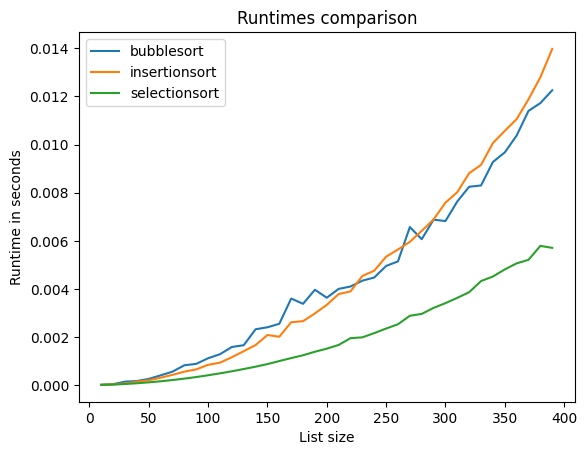

In [49]:
compare_times(bubblesort,insertionsort,selectionsort)

In [53]:
def compare_worst(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Worst Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            worst_time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if worst_time < (end-start): worst_time = (end-start)
            times.append(worst_time)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

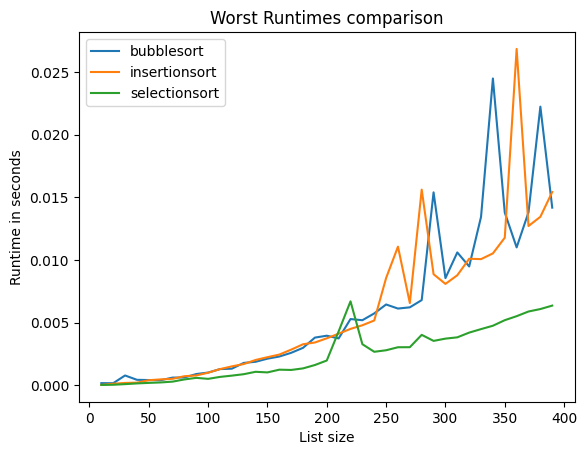

In [54]:
compare_worst(bubblesort,insertionsort,selectionsort)

In [ ]:
def compare_average(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Worst Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                time += (end-start)
            times.append(time/trials)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()